In [3]:
%matplotlib inline
from tqdm import tqdm
import numpy as np
import pymc3 as pm
np.set_printoptions(suppress=True)
import re

/Users/ded/anaconda3/lib/python3.6/site-packages/theano/gpuarray/dnn.py:184: UserWarning: Your cuDNN version is more recent than Theano. If you encounter problems, try updating Theano or downgrading cuDNN to a version >= v5 and <= v7.
  warnings.warn("Your cuDNN version is more recent than "
Using cuDNN version 7201 on context None
Mapped name None to device cuda: GeForce GTX 1080 Ti (0000:86:00.0)
/Users/ded/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [8]:
def plot_traces(trcs, varnames=None):
    '''Plot traces with overlaid means and values'''

    nrows = len(trcs.varnames)
    if varnames is not None:
        nrows = len(varnames)

    ax = pm.traceplot(trcs, varnames=varnames, figsize=(12,nrows*1.4),
                      lines={k: v['mean'] for k, v in
                             pm.summary(trcs,varnames=varnames).iterrows()})

    for i, mn in enumerate(pm.summary(trcs, varnames=varnames)['mean']):
        ax[i,0].annotate('{:.2f}'.format(mn), xy=(mn,0), xycoords='data',
                         xytext=(5,10), textcoords='offset points', rotation=90,
                         va='bottom', fontsize='large', color='#AA0022')
def strip_derived_rvs(rvs):
    '''Remove PyMC3-generated RVs from a list'''

    ret_rvs = []
    for rv in rvs:
        if not (re.search('_log',rv.name) or re.search('_interval',rv.name)):
            ret_rvs.append(rv)
    return ret_rvs

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [prob]
100%|██████████| 100500/100500 [01:27<00:00, 1143.01it/s]


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
prob,0.26,0.03,0.0,0.2,0.33,81055.8,1.0


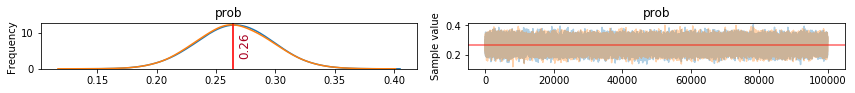

In [14]:
data = pm.Normal.dist(.25).random(size = 1000)
#print(data)
with pm.Model() as model:
    p = pm.Uniform('prob', 0., 1.)
    dis1 = pm.Normal('normal', p , observed=data)
    posterior = pm.sample(100000, cores=1)
rvs = [rv.name for rv in strip_derived_rvs(model.unobserved_RVs)]
plot_traces(posterior, varnames=rvs);
pm.summary(posterior).round(2)